In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
url = "/content/online_shoppers_intention.csv"
data = pd.read_csv(url)


In [ ]:
# Display the first few rows of the dataset
print(data.head())


   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('Revenue', axis=1)  # Features
y = data['Revenue']               # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Build the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8588807785888077

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.91      0.92      3124
        True       0.54      0.57      0.56       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.86      0.86      0.86      3699



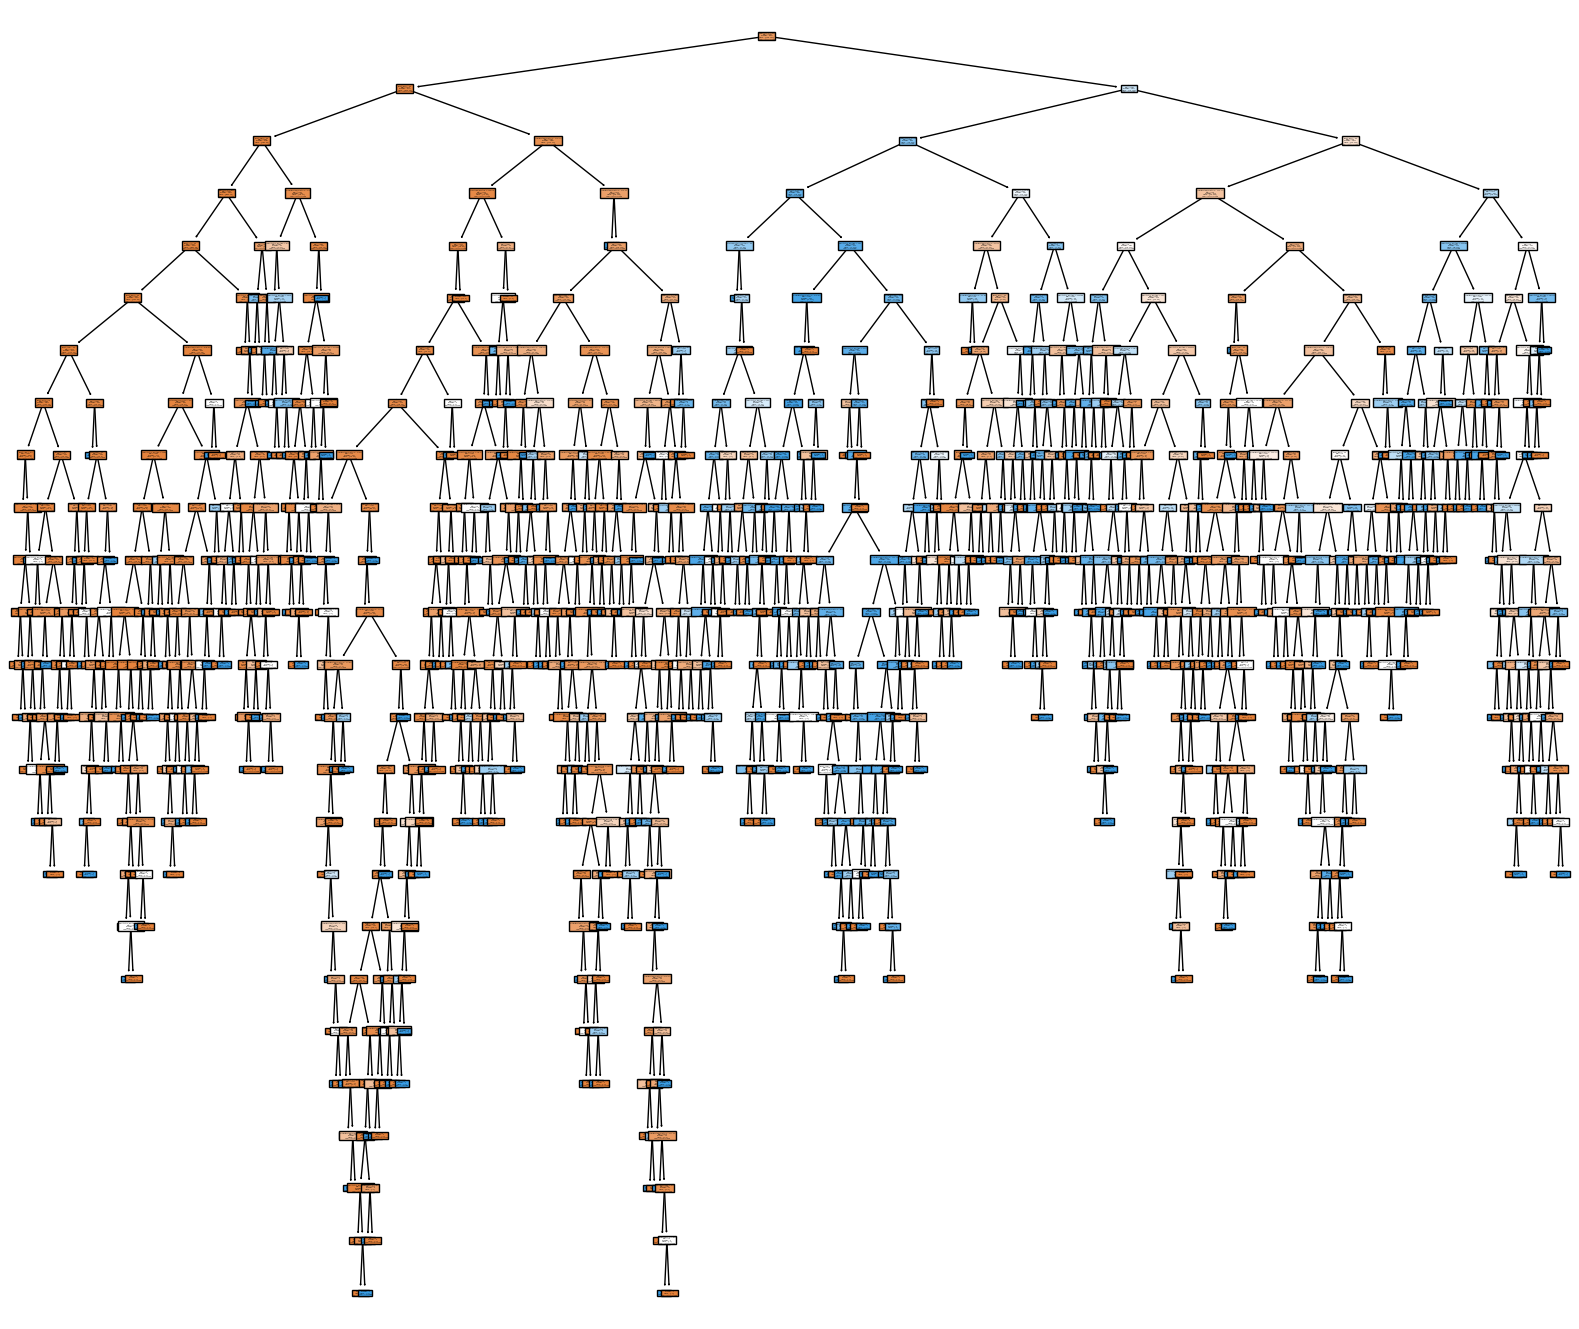

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(20,17))
from sklearn.tree import plot_tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'])
plt.show()
